# The random way to find a good fit

To get the likelihood of many observations, we need to multiply the individual likelihoods, so calculate $L=\prod_i L_i$, or in log likelihood, sum over all likelihoods. If we also ignore the $\ln \sqrt{2\pi} \sigma_i$, which is just a constant, we have
$$
\ln L = -\frac{1}{2} \sum_i \left(\frac{y_i-M_\theta(x_i)}{\sigma_i}\right)^2 
$$
which you should recognise as $\chi^2/2$. 

The simplest method of all to try to fit is to just try at random. Let us try this

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def lnL(yobs, dyobs, ymodel):
    """
    Calculate the log likelihood of a model
    """
    
    return -0.5*np.sum((y-ymodel)**2/dyobs**2)

## Create some fake data

Make some data according to some function.

In [14]:
def make_fake():
    
    # Make the random draws reproducible...
    np.random.seed(100)
    
    x = np.random.uniform(low=-2, high=4, size=15)
    y = x*0.5 + 4
    dy = 0.4
    y_obs = y + np.random.normal(0, dy, size=len(x))

    return (x, y_obs, dy+np.zeros(len(x)))

def show_fake(x, y, dy):
    plt.scatter(x, y)
    plt.errorbar(x, y, dy, fmt='none')

In [15]:
x, y, dy = make_fake()

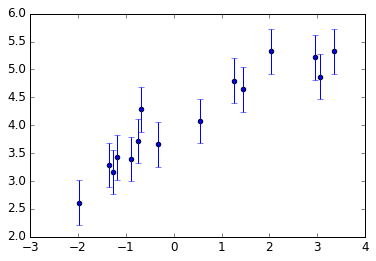

In [16]:
show_fake(x, y, dy)

## Try to find the values by random sampling

Now let us say that we know that we are looking for a model with $y=a + bx$ and that we know that $a\in [2, 6]$ and $b\in [0, 1]$ (lucky us!). Let's see what we can do.

In [17]:
def my_model(x, a, b):
    return a+b*x

def try_many(x, y, dy, a_range=[2, 6], b_range=[0, 1], n_mc=100):
    """
    Draw random a and b values and calculate how well they do.
    """
    
    a_values = np.random.uniform(low=a_range[0], high=a_range[1], size=n_mc)
    b_values = np.random.uniform(low=b_range[0], high=b_range[1], size=n_mc)
    
    # I'm using a loop for clarity - for speed you would not!
    lnLvalues = np.zeros(n_mc)
    for i in range(n_mc):
        ymodel = a_values[i] + b_values[i]*x
        lnLvalues[i] = lnL(y, dy, ymodel)
        
    return (a_values, b_values, lnLvalues)
    
    

In [31]:
a_s, b_s, lnL_s = try_many(x, y, dy, n_mc=20)

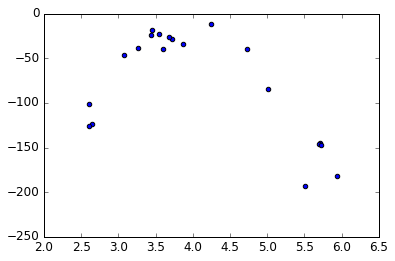

In [32]:
plt.scatter(a_s, lnL_s)

## Create a 2D visualisation of this

In [27]:
def show2D(x, y, lnL):
    fig, ax = plt.subplots(ncols=1, figsize=(10, 4))
    fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
    
    hb = ax.hexbin(x, y, C=lnL, gridsize=50, cmap='inferno',
                   reduce_C_function=np.sum)
    #ax.axis([xmin, xmax, ymin, ymax])
    ax.set_title("Linear fit")
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('log likelihood')

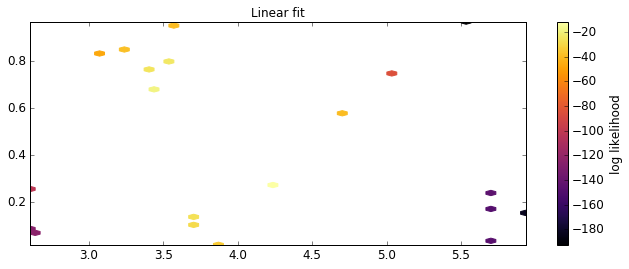

In [33]:
show2D(a_s, b_s, lnL_s)